## Load the required libraries

In [1]:
library(CellChat)
library(patchwork)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



## Create a directory to save figures

In [2]:
data.dir <- '/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison'
dir.create(data.dir)
setwd(data.dir)

Warning message in dir.create(data.dir):
“'/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison' already exists”


## 加载每个数据集的 CellChat 对象，然后合并在一起

In [3]:
cellchat.treatment <- readRDS("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/cellchat_treatment_2.rds")
cellchat.model <- readRDS("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/cellchat_model_2.rds")
cellchat.treatment <- updateCellChat(cellchat.treatment)
cellchat.model <- updateCellChat(cellchat.model)
object.list <- list(model = cellchat.model, treatment = cellchat.treatment)
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
cellchat

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



An object of class CellChat created from a merged object with multiple datasets 
 950 signaling genes.
 3844 cells. 
CellChat analysis of spatial data! The input spatial locations are 
NULL

## 第一部分：预测细胞间通讯的一般原理

### 比较交互总数和交互强度

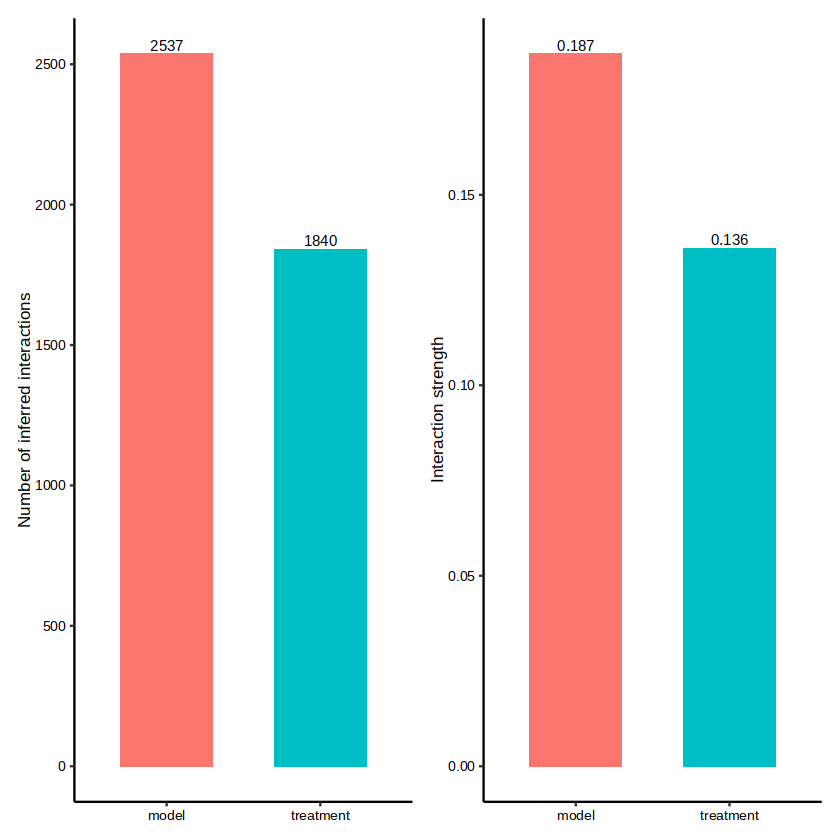

In [4]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
gg1 + gg2

### 比较不同细胞群之间的相互作用次数和相互作用强度

#### 不同细胞群之间的相互作用或相互作用强度的差异

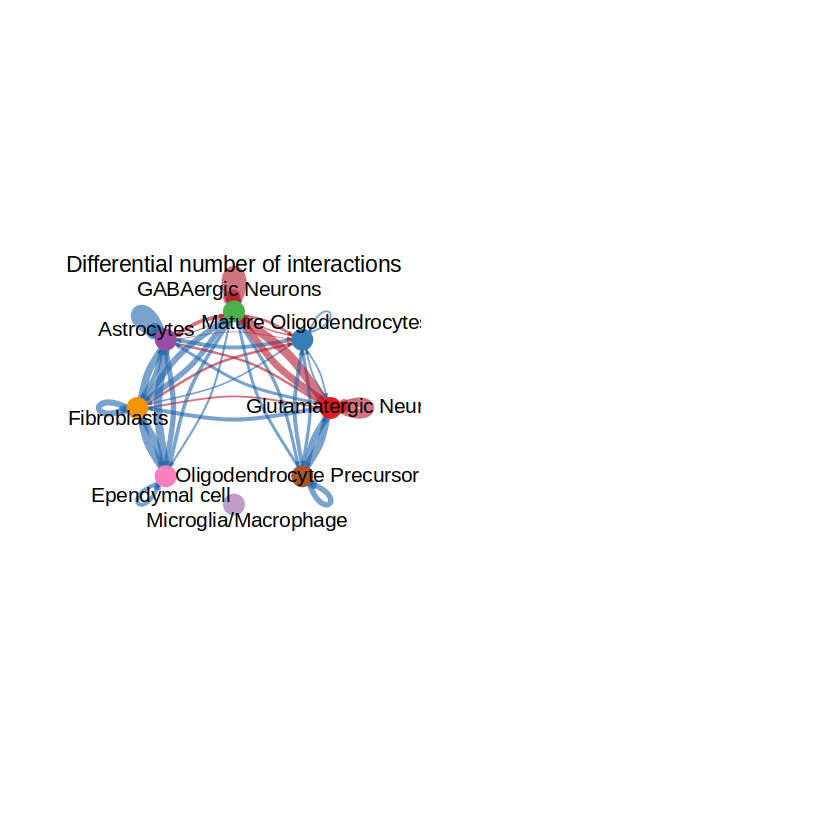

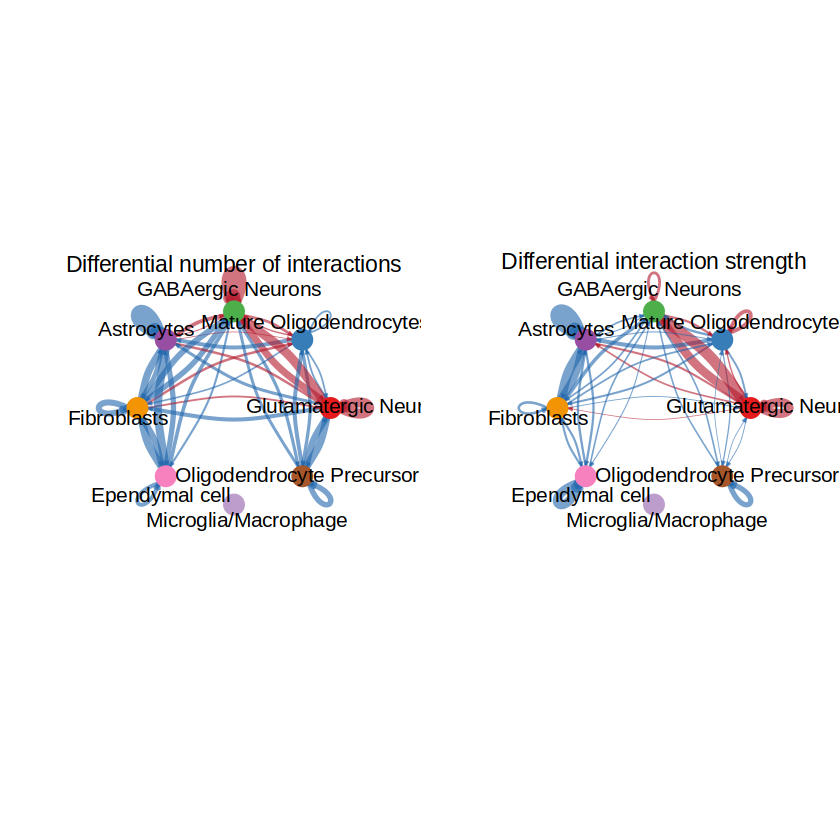

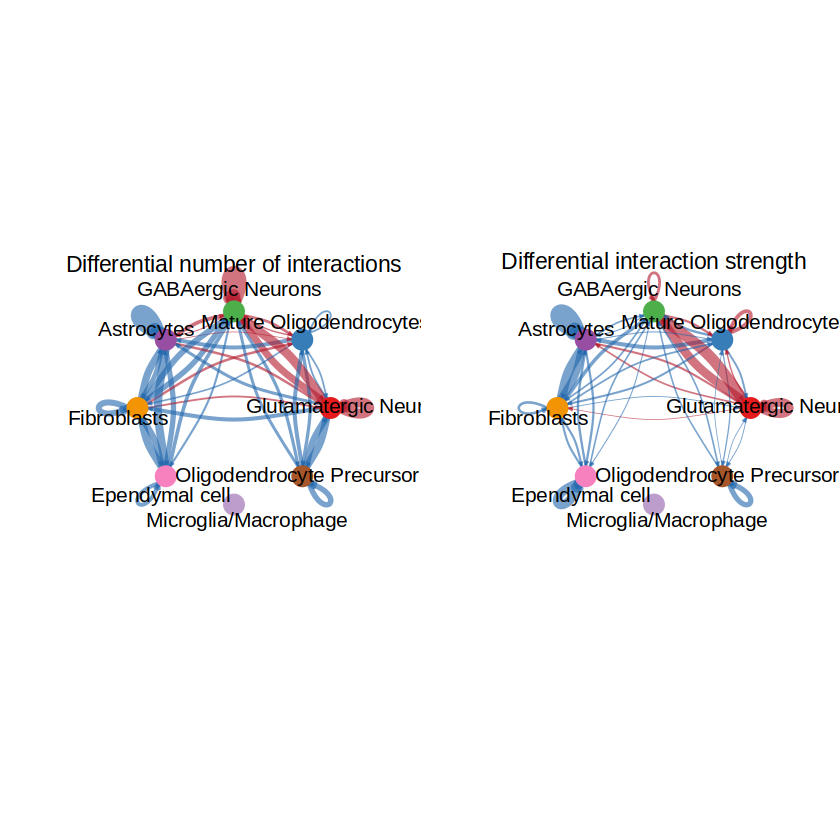

In [15]:
par(mfrow = c(1,2), xpd=TRUE)
netVisual_diffInteraction(cellchat, weight.scale = T)
netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight")

In [6]:
object.list

$model
An object of class CellChat created from a single dataset 
 16142 genes.
 2327 cells. 
CellChat analysis of spatial data! The input spatial locations are 
                     x_cent y_cent
AAACAAGTATCTCCCA-1_1   9846  11704
AAACATTTCCCGGATT-1_1  11744  11206
AAACCTAAGCAGCCGG-1_1  12433   9816
AAACGAGACGGTTGAT-1_1   7253   9425
AAACGGGCGTACGGGT-1_1  12434  10609
AAACGGTTGCGAACTG-1_1  12776   7434

$treatment
An object of class CellChat created from a single dataset 
 16142 genes.
 1517 cells. 
CellChat analysis of spatial data! The input spatial locations are 
                     x_cent y_cent
AAACACCAATAACTGC-1_1  11389   3467
AAACAGCTTTCAGAAG-1_1   8626   2478
AAACAGGGTCTATATT-1_1   9317   2874
AAACATGGTGAGAGGA-1_1  11905   1581
AAACCGGGTAGGTACC-1_1   8456   4363
AAACCGTTCGTCCAGG-1_1  10184   5750


In [7]:
gg1 <- netVisual_heatmap(cellchat)
gg2 <- netVisual_heatmap(cellchat, measure = "weight")

Do heatmap based on a merged object 


Do heatmap based on a merged object 




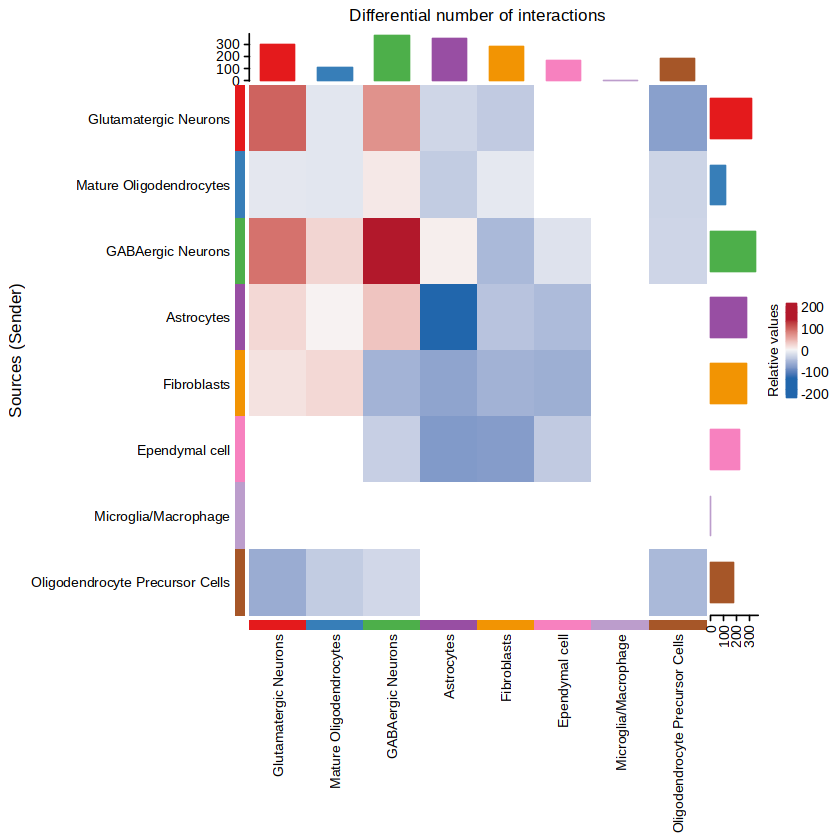

In [8]:
gg1

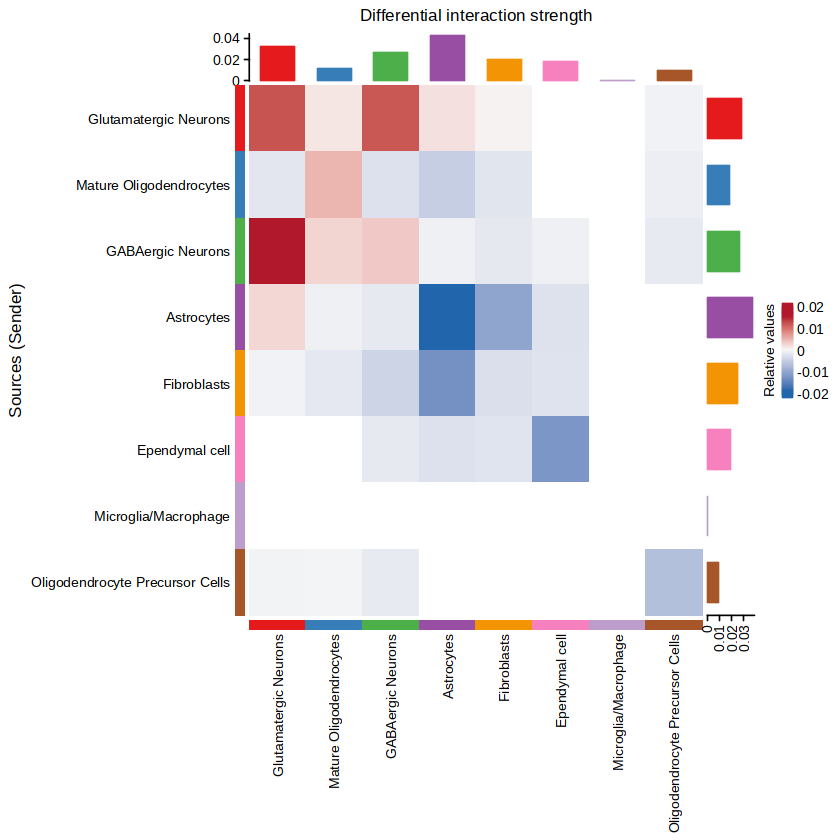

In [9]:
gg2

In [10]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison/celltype_celltype.pdf",width =5, height = 4.5)
gg2
dev.off()

png 
  2

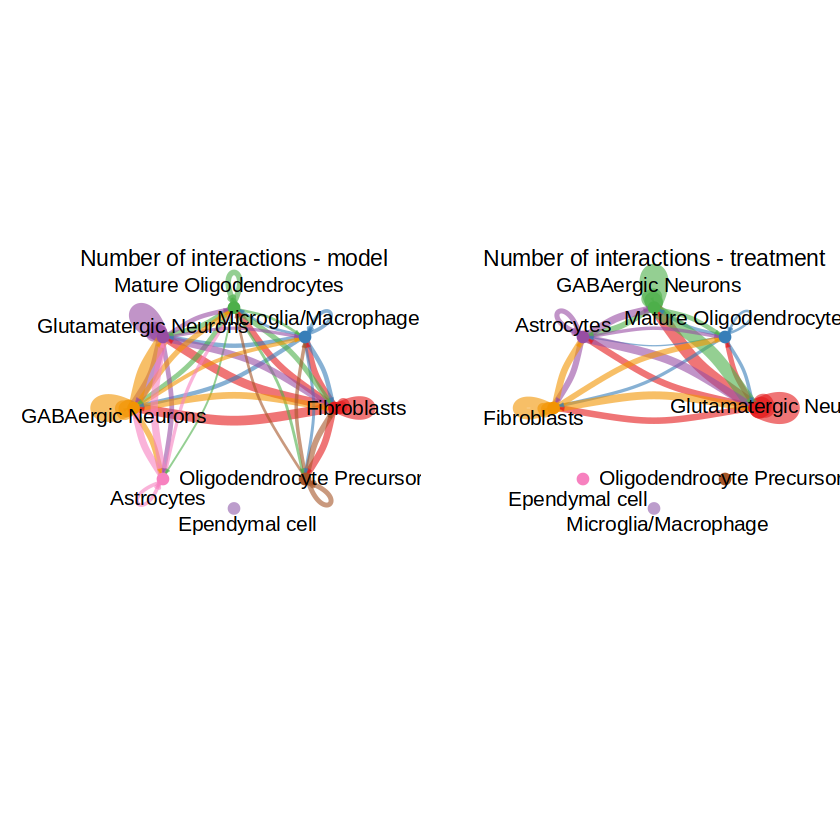

In [11]:
weight.max <- getMaxWeight(object.list, attribute = c("idents","count"))
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_circle(object.list[[i]]@net$count, weight.scale = T, label.edge= F, edge.weight.max = weight.max[2], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}

#### 不同细胞类型之间的相互作用或相互作用强度的差异

In [12]:
unique(cellchat@idents$treatment)

[1] Glutamatergic Neurons           Mature Oligodendrocytes        
[3] GABAergic Neurons               Astrocytes                     
[5] Fibroblasts                     Ependymal cell                 
[7] Microglia/Macrophage            Oligodendrocyte Precursor Cells
8 Levels: Glutamatergic Neurons Mature Oligodendrocytes ... Oligodendrocyte Precursor Cells

In [16]:
group.cellType <- c(rep("Glutamatergic Neurons", 2), rep("Mature Oligodendrocytes", 2), rep("GABAergic Neurons", 2), rep("Astrocytes", 2))
group.cellType <- factor(group.cellType, levels = c("Glutamatergic Neurons", "Mature Oligodendrocytes", "GABAergic Neurons", "Astrocytes"))
object.list <- lapply(object.list, function(x) {mergeInteractions(x, group.cellType)})
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [17]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 950 signaling genes.
 3844 cells. 
CellChat analysis of spatial data! The input spatial locations are 
NULL

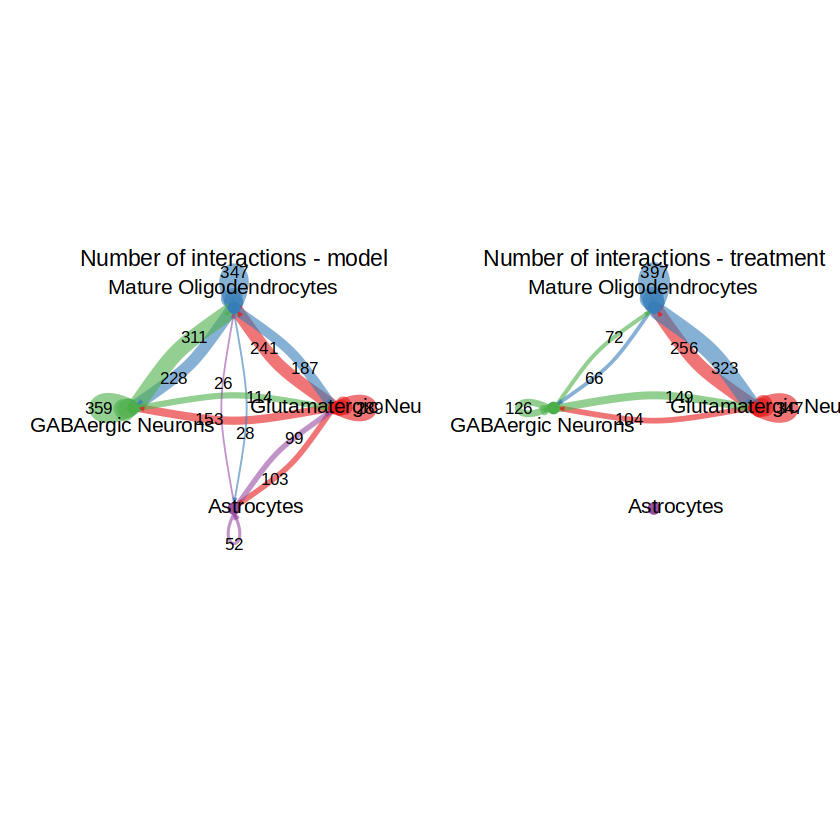

In [18]:
weight.max <- getMaxWeight(object.list, slot.name = c("idents", "net", "net"), attribute = c("idents","count", "count.merged"))
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_circle(object.list[[i]]@net$count.merged, weight.scale = T, label.edge= T, edge.weight.max = weight.max[3], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}

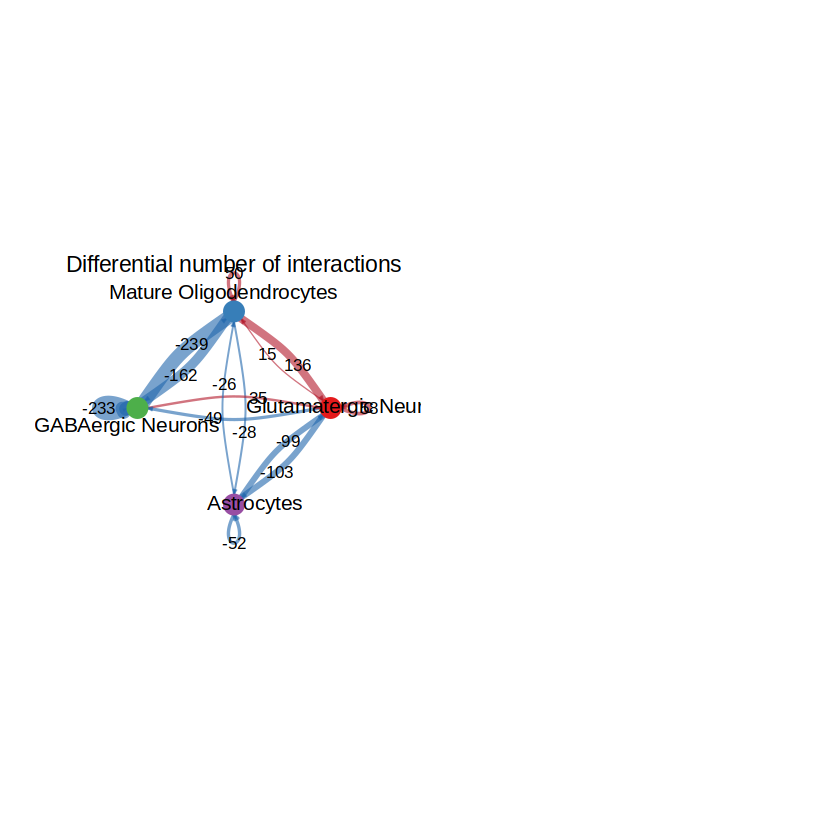

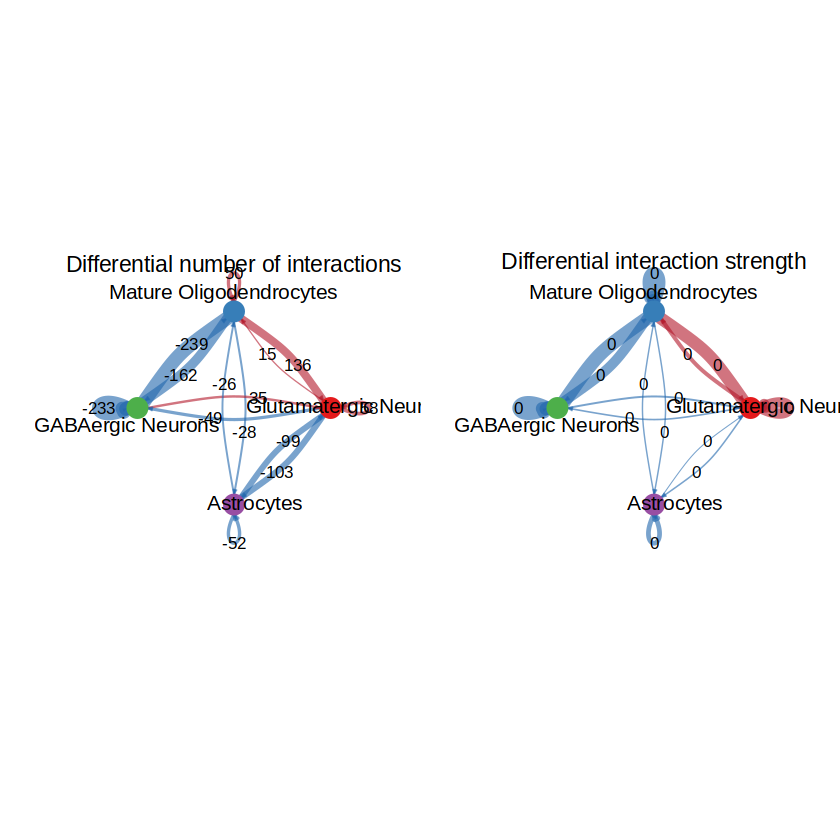

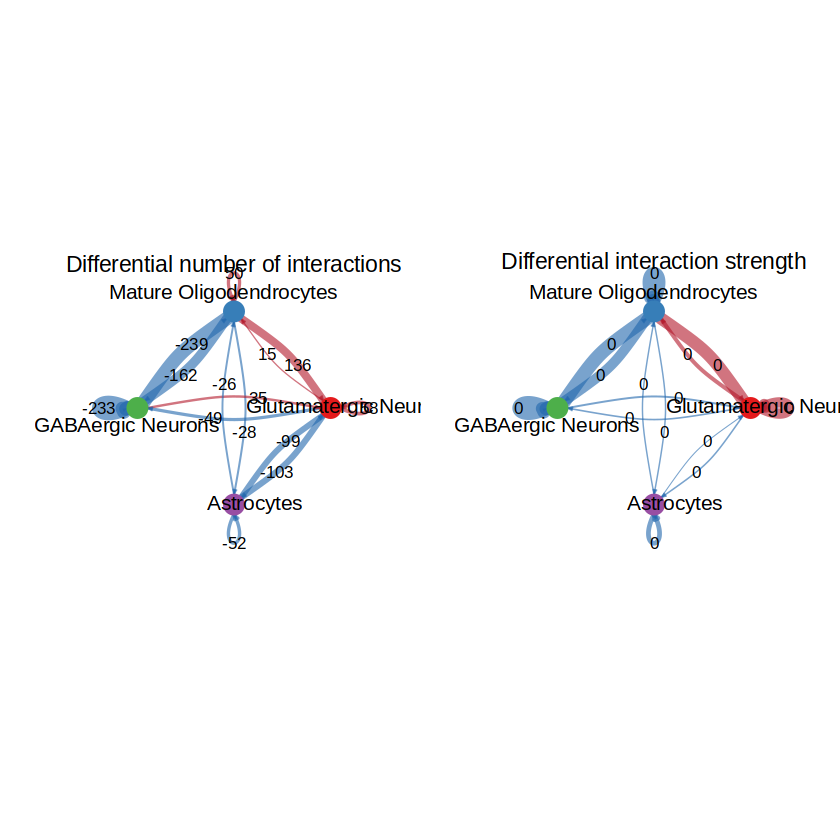

In [19]:
par(mfrow = c(1,2), xpd=TRUE)
netVisual_diffInteraction(cellchat, weight.scale = T, measure = "count.merged", label.edge = T)
netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight.merged", label.edge = T)

### 比较二维空间中的主要源和目标

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



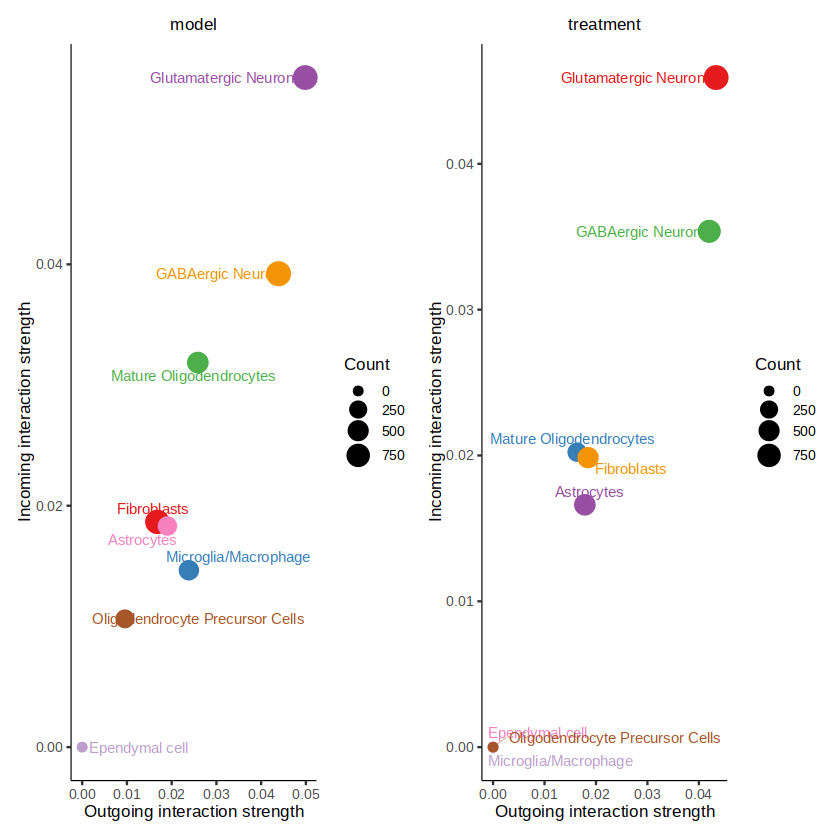

In [20]:
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})
weight.MinMax <- c(min(num.link), max(num.link)) # control the dot size in the different datasets
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax)
}
patchwork::wrap_plots(plots = gg)

### 识别与一个细胞群相关的信号变化

In [21]:
unique(cellchat@idents$treatment)

[1] Glutamatergic Neurons           Mature Oligodendrocytes        
[3] GABAergic Neurons               Astrocytes                     
[5] Fibroblasts                     Ependymal cell                 
[7] Microglia/Macrophage            Oligodendrocyte Precursor Cells
8 Levels: Glutamatergic Neurons Mature Oligodendrocytes ... Oligodendrocyte Precursor Cells

Visualizing differential outgoing and incoming signaling changes from model to treatment

Visualizing differential outgoing and incoming signaling changes from model to treatment



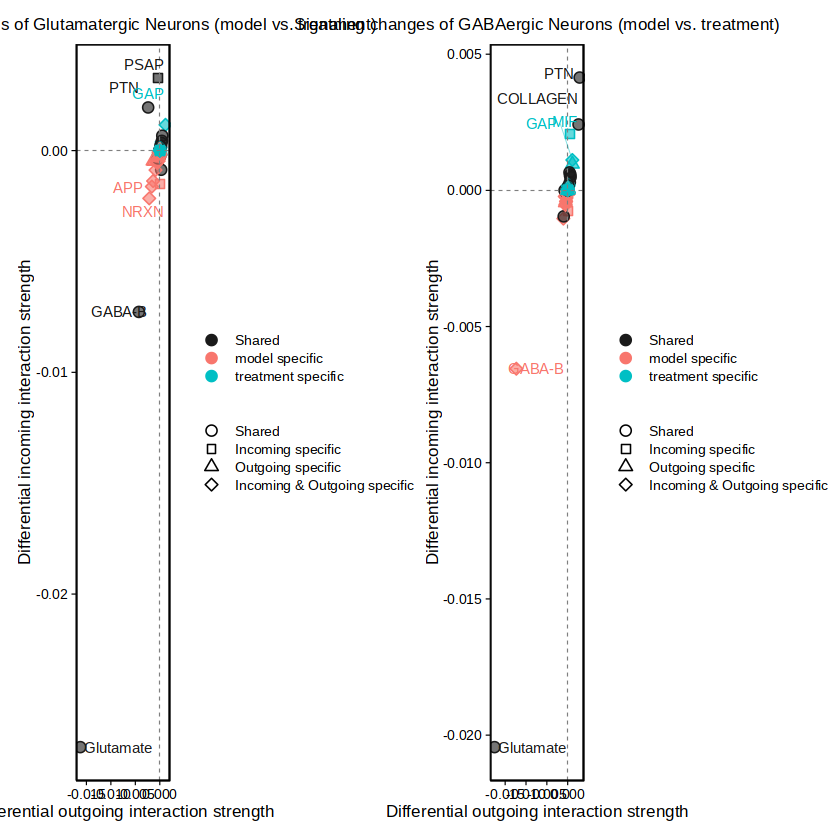

In [22]:
gg1 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "Glutamatergic Neurons", signaling.exclude = "SEMA4")
gg2 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "GABAergic Neurons", signaling.exclude = c("SEMA4"))
patchwork::wrap_plots(plots = list(gg1,gg2))

## 识别保守和上下文特异性的信号通路

### 根据功能/结构相似性识别差异较大（或较小）的信令网络以及信令组

#### 根据功能相似性识别信号组

功能相似性：高度的功能相似性表明主要发送者和接收者相似，可以解释为两个信号通路或两个配体-受体对表现出相似和/或冗余的作用。注意：功能相似性分析不适用于具有不同细胞类型组成的多个数据集。

Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 
Classification learning of the signaling networks for datasets 1 2 
2D visualization of signaling networks from datasets 1 2 


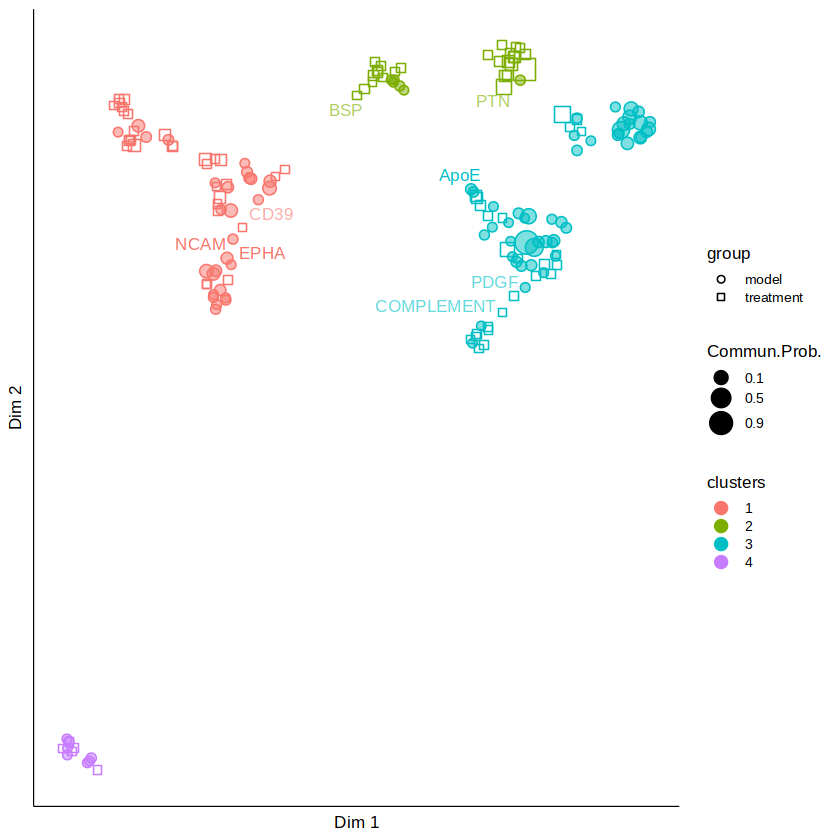

In [23]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "functional")
cellchat <- netEmbedding(cellchat, type = "functional")
cellchat <- netClustering(cellchat, type = "functional")
# Visualization in 2D-space
netVisual_embeddingPairwise(cellchat, type = "functional", label.size = 3.5)
# netVisual_embeddingZoomIn(cellchat, type = "functional", nCol = 2)

#### 根据结构相似性识别信号组

In [ ]:
结构相似性：使用结构相似性来比较它们的信令网络结构，而不考虑发送方和接收方的相似性。注意：结构相似性分析适用于具有相同细胞类型组成或细胞类型组成截然不同的多个数据集。

Compute signaling network similarity for datasets 1 2 
Manifold learning of the signaling networks for datasets 1 2 
Classification learning of the signaling networks for datasets 1 2 
2D visualization of signaling networks from datasets 1 2 
2D visualization of signaling networks from datasets 1 2 


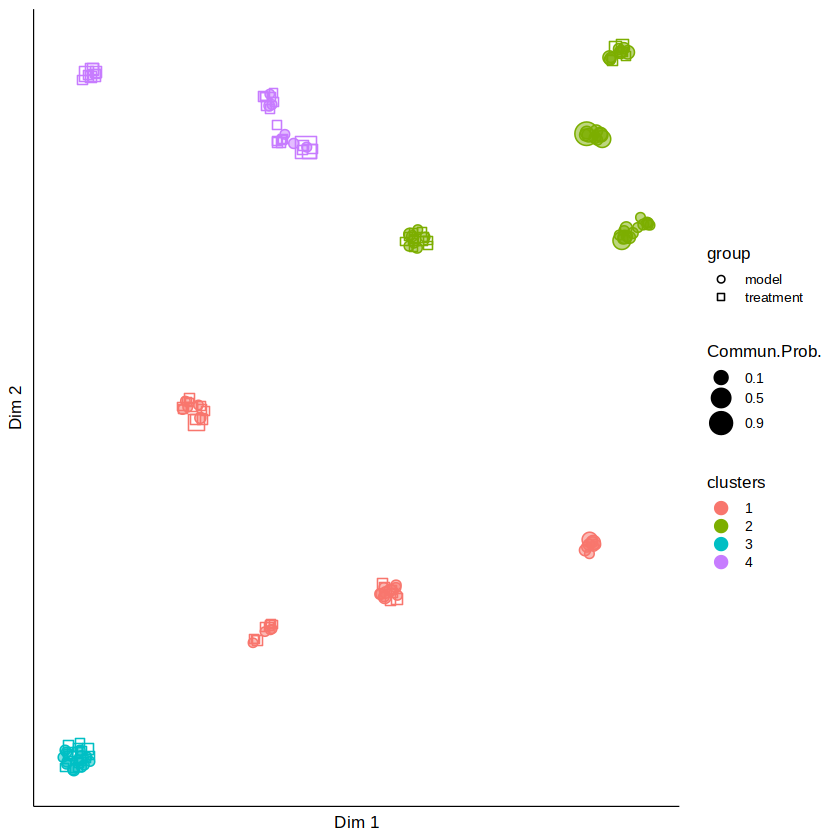

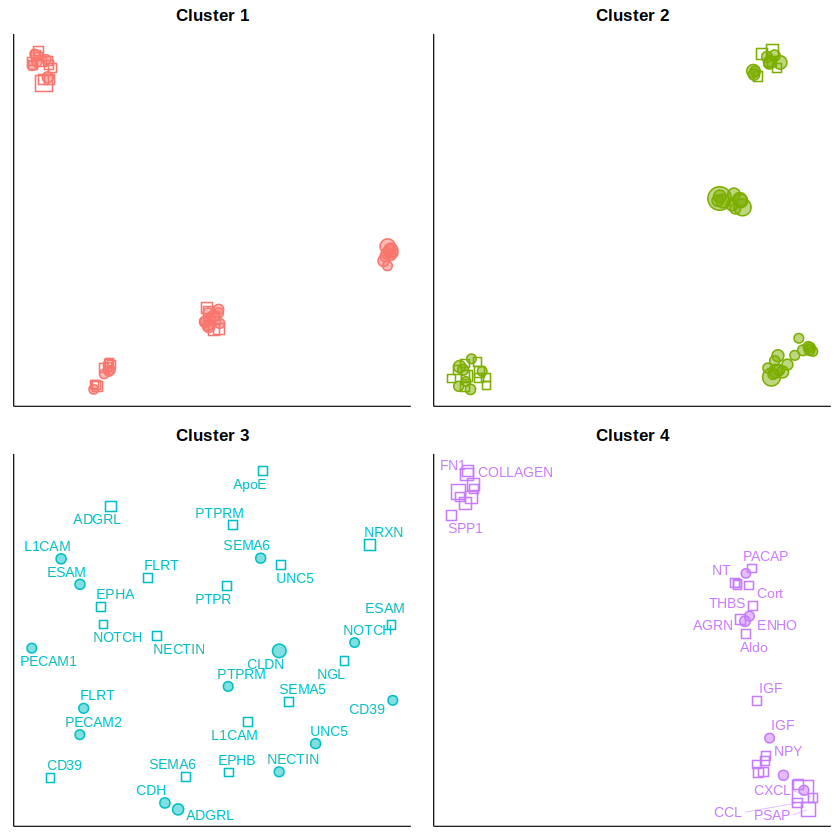

In [24]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "structural")
cellchat <- netEmbedding(cellchat, type = "structural")
cellchat <- netClustering(cellchat, type = "structural")
# Visualization in 2D-space
netVisual_embeddingPairwise(cellchat, type = "structural", label.size = 3.5)
netVisual_embeddingPairwiseZoomIn(cellchat, type = "structural", nCol = 2)

#### 计算并可视化学习到的关节流形中的通路距离

Compute the distance of signaling networks between datasets 1 2 


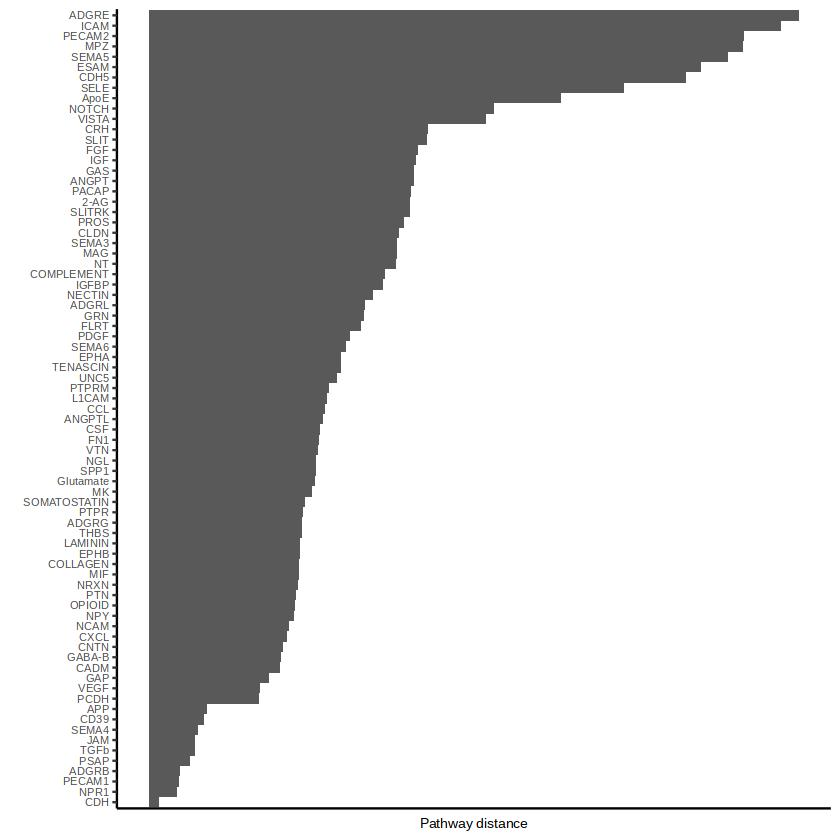

In [25]:
rankSimilarity(cellchat, type = "functional")

### 识别和可视化保守的和特定于上下文的信号通路

#### 比较每个信号通路的整体信息流

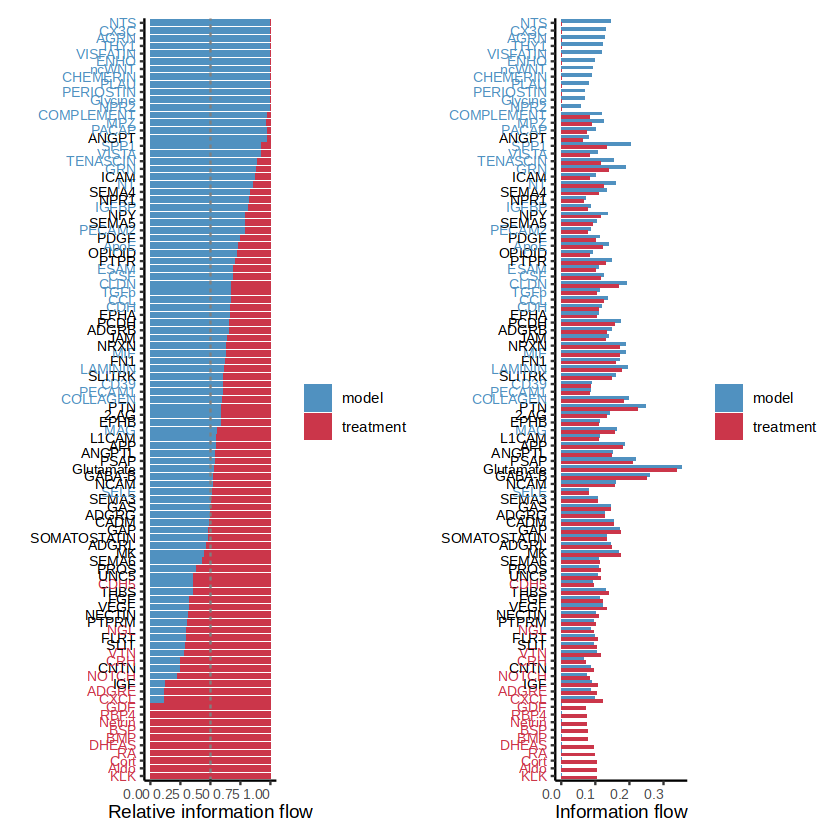

In [4]:
gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", stacked = T, do.stat = TRUE, cutoff.pvalue = 0.05, color.use = c("#5091c0", "#cb364a"))
gg2 <- rankNet(cellchat, mode = "comparison", measure = "weight", stacked = F, do.stat = TRUE, cutoff.pvalue = 0.05, color.use = c("#5091c0", "#cb364a"))
gg1 + gg2

In [37]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/comparison/comparison/compare_LR.pdf",width =4, height = 10)
gg1
dev.off()

png 
  2

#### 比较与每个细胞群相关的传出（或传入）信号传导

In [38]:
library(ComplexHeatmap)
i = 1
# combining all the identified signaling pathways from different datasets 
pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6)

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




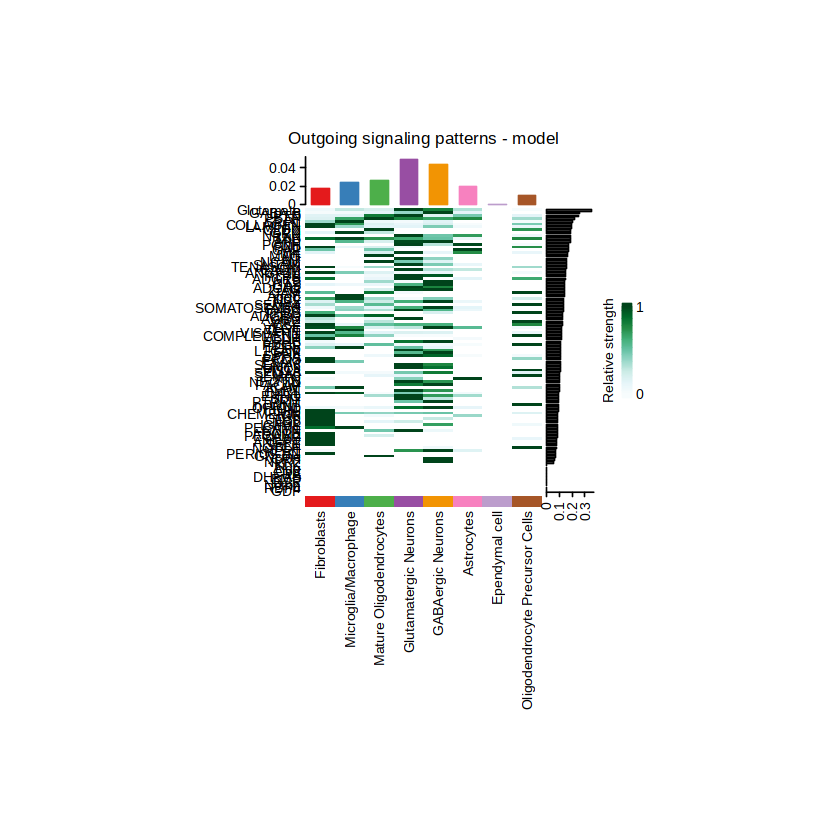

In [39]:
ht1

In [55]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison/compare_Pathway_outgoing.pdf",width =4, height = 30)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i+1], width =4, height = 30)
ht2
dev.off()

png 
  2

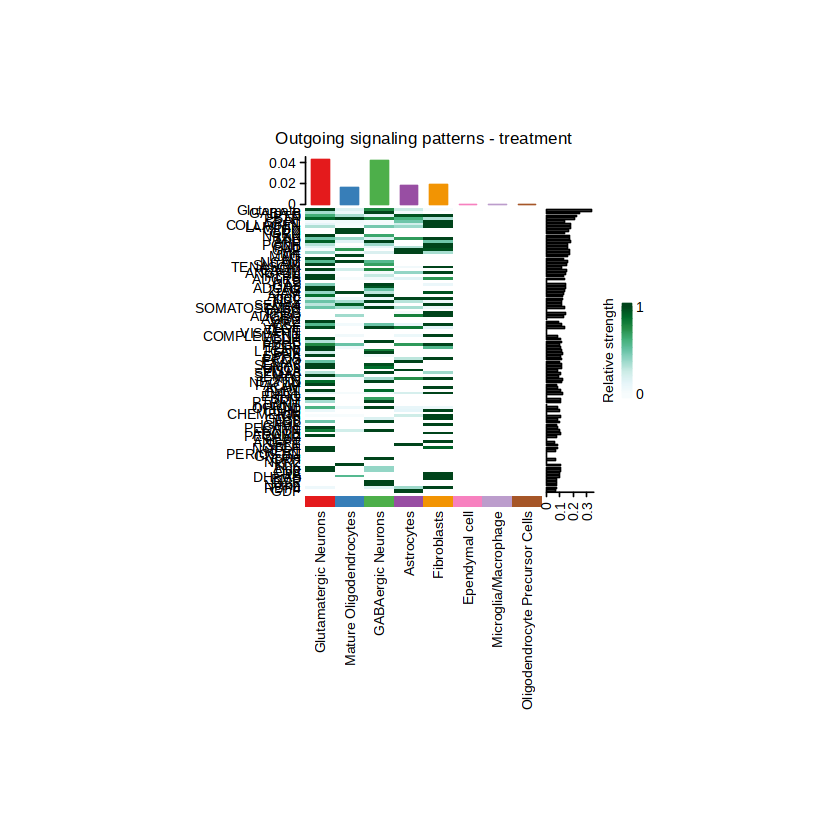

In [ ]:
ht2

In [31]:
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "incoming", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6, color.heatmap = "GnBu")
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "incoming", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6, color.heatmap = "GnBu")
# draw(ht1 + ht2, ht_gap = unit(0.5, "cm"))

In [54]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison/compare_Pathway_incoming.pdf",width =4, height = 30)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "incoming", signaling = pathway.union, title = names(object.list)[i+1], width = 4, height = 30, color.heatmap = "GnBu")
ht2
dev.off()

png 
  2

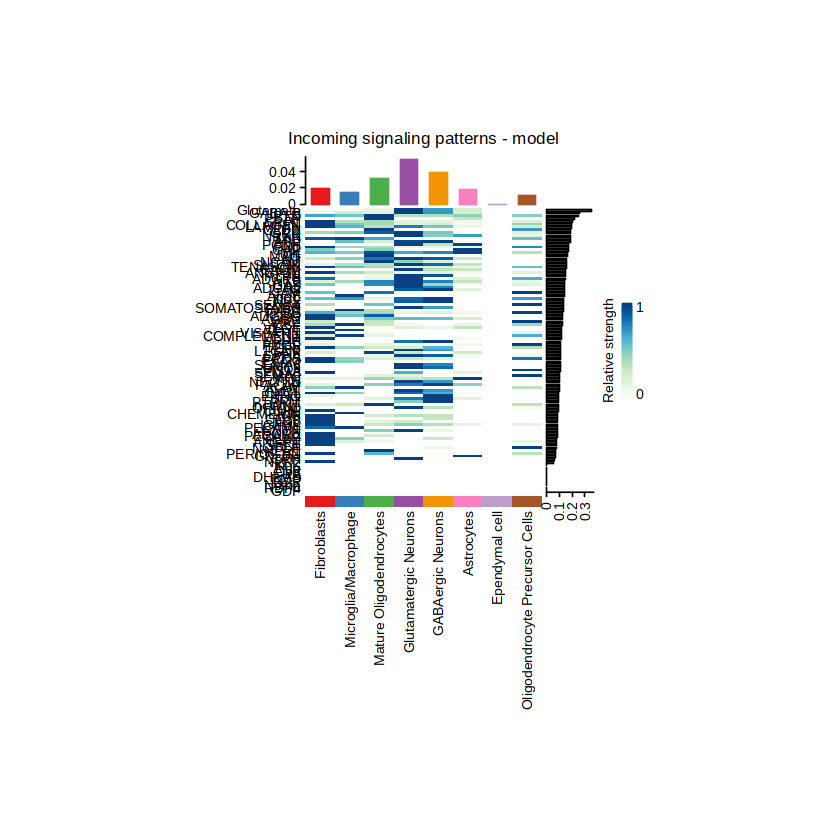

In [32]:
ht1

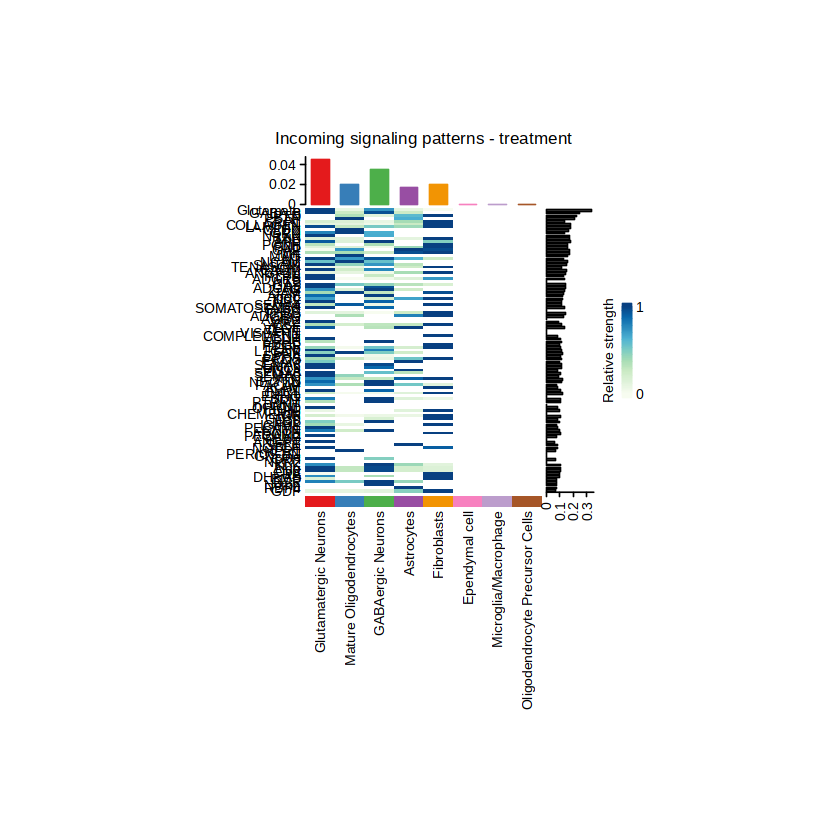

In [33]:
ht2

In [34]:
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6, color.heatmap = "OrRd")
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6, color.heatmap = "OrRd")
# draw(ht1 + ht2, ht_gap = unit(0.5, "cm"))

In [84]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison/compare_Pathway_all.pdf",width =4, height = 30)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+1], width = 4, height = 30, color.heatmap = "GnBu")
ht2
dev.off()

png 
  2

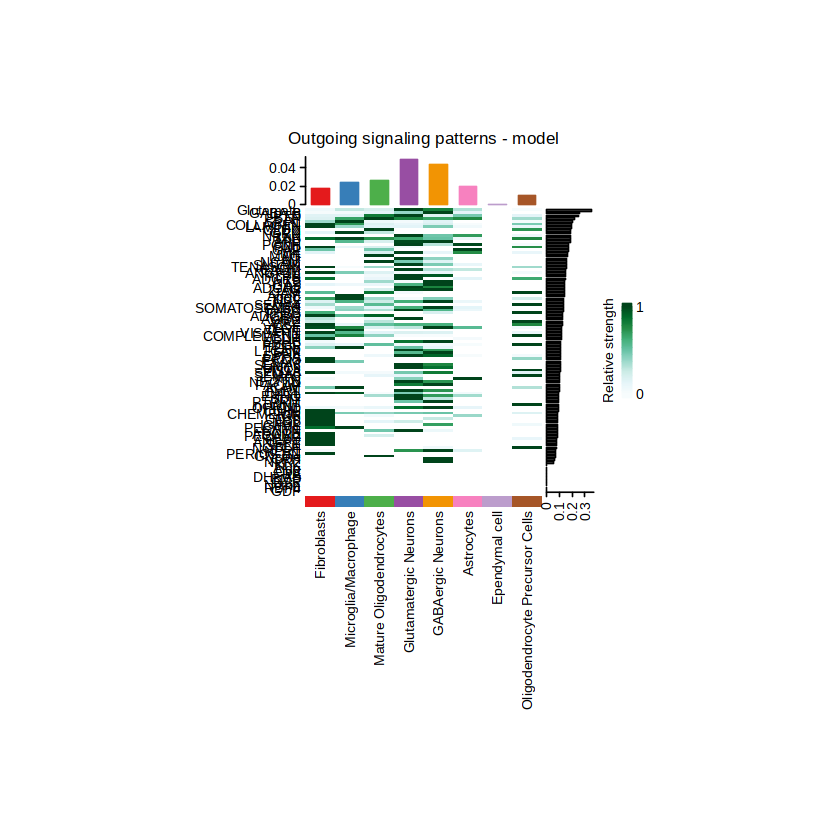

In [64]:
ht1

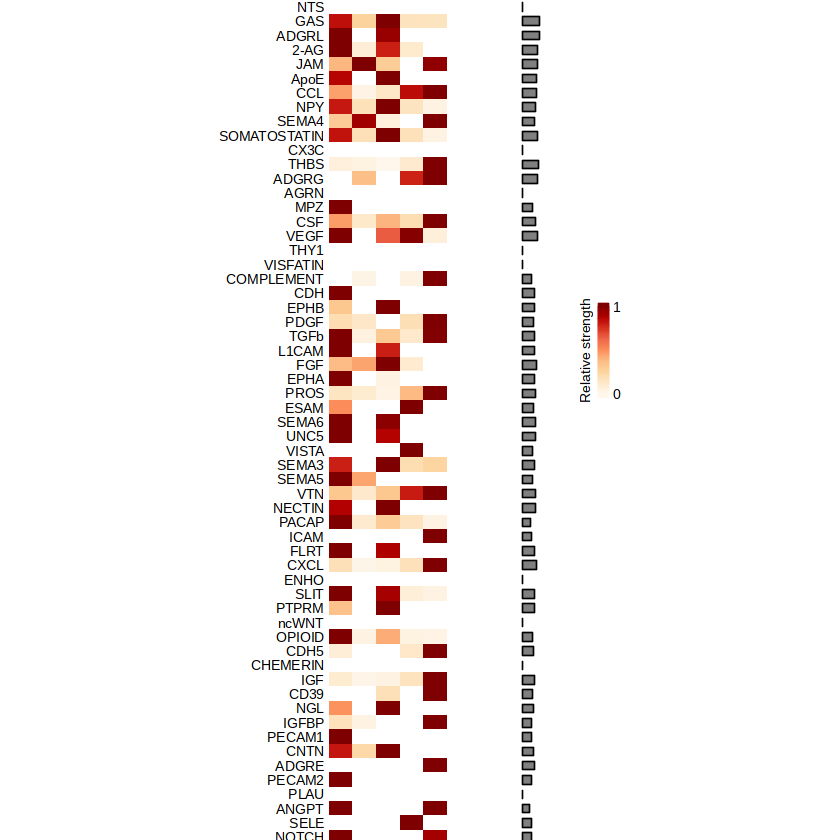

In [65]:
ht2

## 识别上调和下调的信号配体-受体对

### 通过比较通信概率来识别功能失调的信号传导

In [66]:
unique(cellchat@idents$treatment)

[1] Glutamatergic Neurons           Mature Oligodendrocytes        
[3] GABAergic Neurons               Astrocytes                     
[5] Fibroblasts                     Ependymal cell                 
[7] Microglia/Macrophage            Oligodendrocyte Precursor Cells
8 Levels: Glutamatergic Neurons Mature Oligodendrocytes ... Oligodendrocyte Precursor Cells

In [67]:
unique(cellchat@idents$model)

[1] Fibroblasts                     Microglia/Macrophage           
[3] Mature Oligodendrocytes         Glutamatergic Neurons          
[5] GABAergic Neurons               Astrocytes                     
[7] Ependymal cell                  Oligodendrocyte Precursor Cells
8 Levels: Fibroblasts Microglia/Macrophage ... Oligodendrocyte Precursor Cells

Comparing communications on a merged object 




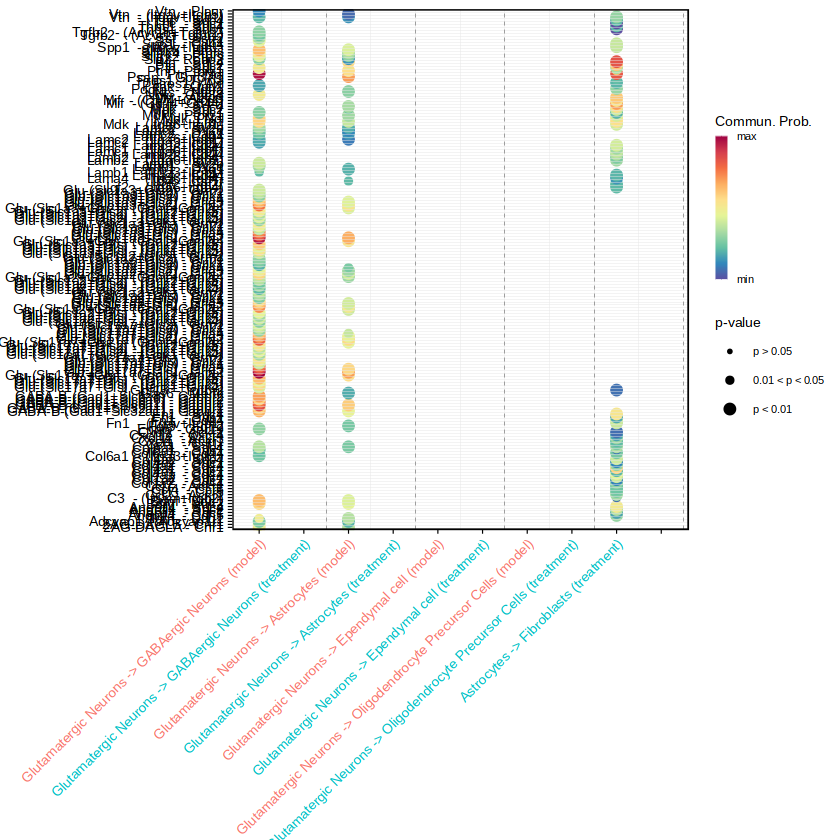

In [68]:
netVisual_bubble(cellchat, sources.use = 4, targets.use = c(5:11),  comparison = c(1, 2), angle.x = 45)

Comparing communications on a merged object 




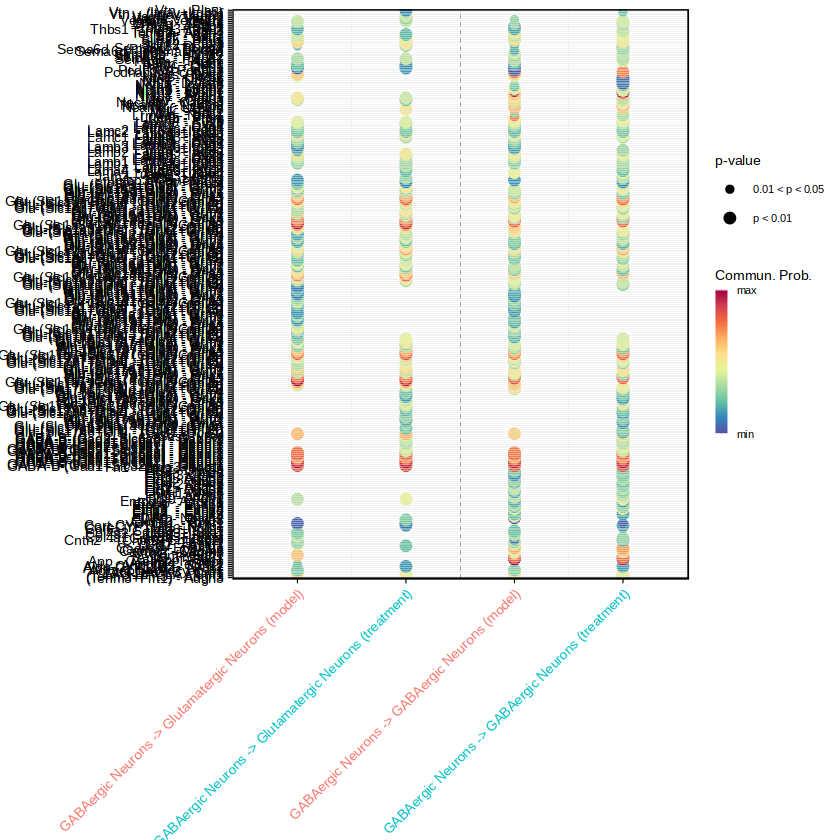

In [71]:
netVisual_bubble(cellchat, sources.use = "GABAergic Neurons", targets.use = c("Glutamatergic Neurons", "GABAergic Neurons"),  comparison = c(1, 2), angle.x = 45)

In [78]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison/MOL&FB_MOL&FB.pdf",width =4, height = 35)
netVisual_bubble(cellchat, sources.use = c("Mature Oligodendrocytes", "Fibroblasts"), targets.use = c("Mature Oligodendrocytes", "Fibroblasts"), comparison = c(1, 2), angle.x = 45)
dev.off()

Comparing communications on a merged object 




png 
  2

In [79]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison/MOL&FB_MOL&FB_SEMA4.pdf",width =4, height = 4)
netVisual_bubble(cellchat, sources.use = c("Mature Oligodendrocytes", "Fibroblasts"), targets.use = c("Mature Oligodendrocytes", "Fibroblasts"), signaling = "SEMA4", comparison = c(1, 2), angle.x = 45)
dev.off()

Comparing communications on a merged object 




png 
  2

In [83]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/result/treatment_vs_model_comparison/SEMA4.pdf",width =8, height = 6)
netVisual_bubble(cellchat, sources.use = c("Mature Oligodendrocytes", "Fibroblasts", "Glutamatergic Neurons", "Oligodendrocyte Precursor Cells"), targets.use = c("Mature Oligodendrocytes", "Fibroblasts", "Glutamatergic Neurons", "Oligodendrocyte Precursor Cells"), signaling = "SEMA4", comparison = c(1, 2), angle.x = 45)
dev.off()

Comparing communications on a merged object 




png 
  2

Comparing communications on a merged object 


Comparing communications on a merged object 




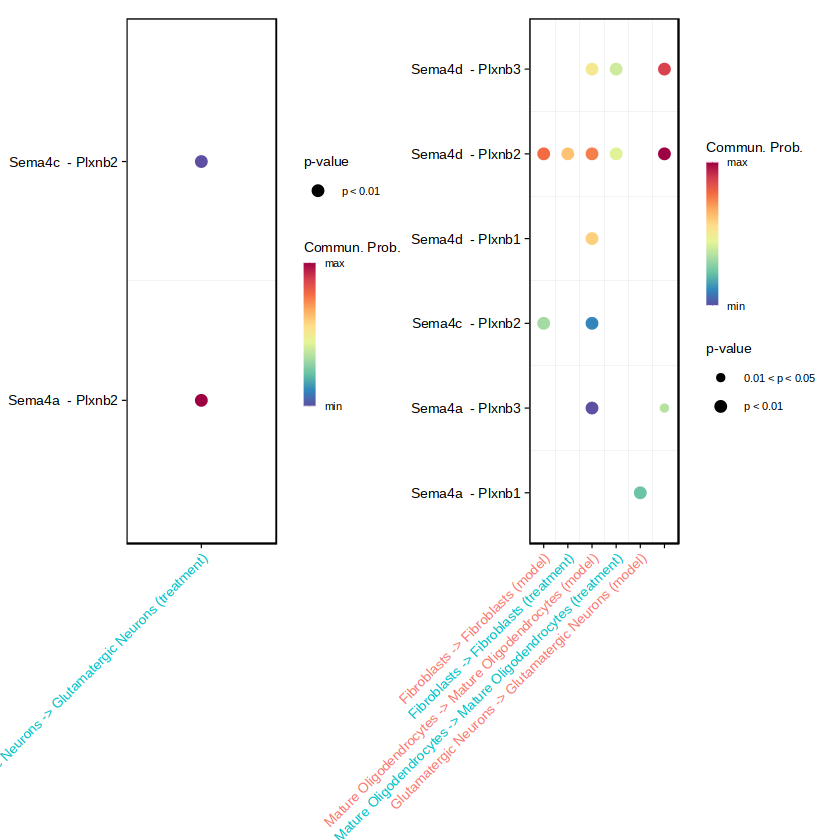

In [85]:
gg1 <- netVisual_bubble(cellchat, signaling = "SEMA4", comparison = c(1, 2), max.dataset = 2, angle.x = 45, remove.isolate = T)
gg2 <- netVisual_bubble(cellchat, signaling = "SEMA4", comparison = c(1, 2), max.dataset = 1, angle.x = 45, remove.isolate = T)
gg1 + gg2

Comparing communications on a merged object 


Comparing communications on a merged object 




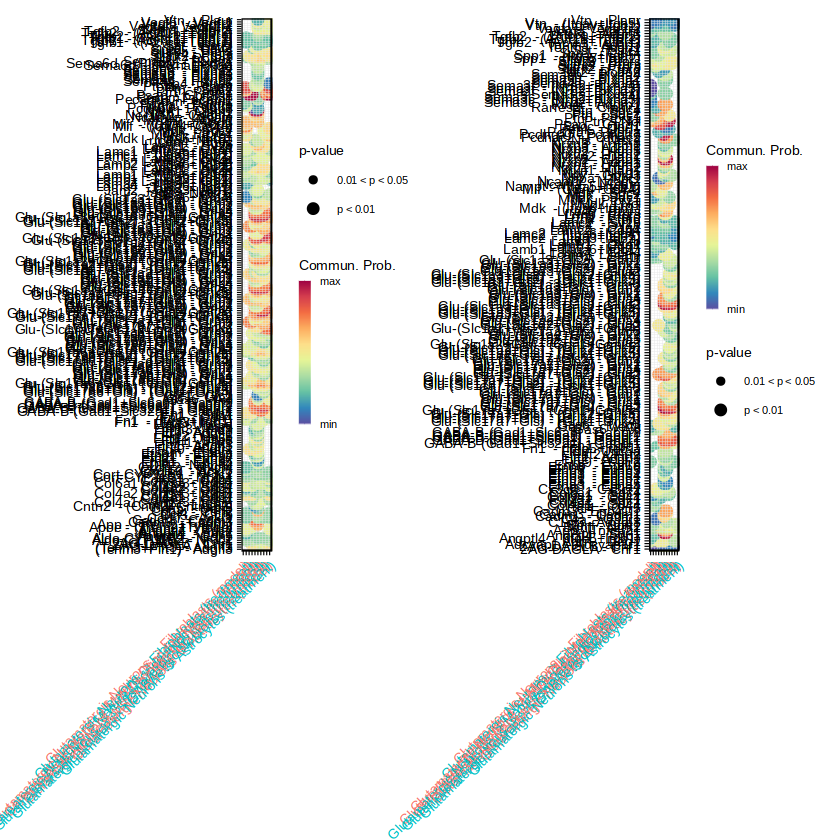

In [69]:
gg1 <- netVisual_bubble(cellchat, sources.use = 4, targets.use = c(1:9),  comparison = c(1, 2), max.dataset = 2, angle.x = 45, remove.isolate = T)
gg2 <- netVisual_bubble(cellchat, sources.use = 4, targets.use = c(1:9),  comparison = c(1, 2), max.dataset = 1, angle.x = 45, remove.isolate = T)
gg1 + gg2

In [ ]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/comparison/comparison/celltype_LR.pdf", width =9, height = 5)
gg1+gg2
dev.off()

png 
  2

### 使用差异表达分析识别功能失调的信号传导

In [92]:
# define a positive dataset, i.e., the dataset with positive fold change against the other dataset
pos.dataset = "treatment"
# define a char name used for storing the results of differential expression analysis
features.name = pos.dataset
# perform differential expression analysis
cellchat <- identifyOverExpressedGenes(cellchat, group.dataset = "datasets", pos.dataset = pos.dataset, features.name = features.name, only.pos = FALSE, thresh.pc = 0.1, thresh.fc = 0.1, thresh.p = 1)
# map the results of differential expression analysis onto the inferred cell-cell communications to easily manage/subset the ligand-receptor pairs of interest
net <- netMappingDEG(cellchat, features.name = features.name)
# extract the ligand-receptor pairs with upregulated ligands in LS
net.up <- subsetCommunication(cellchat, net = net, datasets = "treatment",ligand.logFC = 0.2, receptor.logFC = NULL)
# extract the ligand-receptor pairs with upregulated ligands and upregulated recetptors in NL, i.e.,downregulated in LS
net.down <- subsetCommunication(cellchat, net = net, datasets = "model",ligand.logFC = -0.1)

Use the joint cell labels from the merged CellChat object



In [93]:
table(net.down$pathway_name)


       ADGRB        ADGRE        ADGRG       ANGPTL          APP          CCL 
           5            1            2           24            1           42 
         CDH     CHEMERIN     COLLAGEN   COMPLEMENT          CSF         CX3C 
           1            1           89           10            5            1 
        CXCL         ESAM          FN1       GABA-B    Glutamate          GRN 
          12            2           25            3          100            5 
        ICAM          JAM      LAMININ          MIF          MPZ        ncWNT 
           2            5           31           12            2            6 
         NPY         NRXN           NT          NTS        PACAP         PCDH 
          12            3           17           20            5            1 
      PECAM1       PECAM2    PERIOSTIN         PLAU         PSAP        SEMA3 
           2            1            3            5            5            7 
       SEMA4        SEMA5       SLITRK SOMATOSTATIN

In [41]:
gene.up <- extractGeneSubsetFromPair(net.up, cellchat)
gene.down <- extractGeneSubsetFromPair(net.down, cellchat)

In [95]:
gene.down

[1] "Wnt5a"     "Vegfa"     "Mif"       "Il34"      "Csf1"      "Spp1"     
 [7] "Nampt"     "Angptl4"   "C3"        "Npy"       "Adcyap1"   "Bdnf"     
[13] "Sema3c"    "Slitrk5"   "Plau"      "Fn1"       "Lamc1"     "Lamc2"    
[19] "Col4a1"    "Col4a2"    "Col6a3"    "Col9a3"    "Tnc"       "Tnr"      
[25] "Cdh2"      "Esam"      "Icam1"     "Icam2"     "Jam3"      "Mpzl1"    
[31] "Pecam1"    "Sema4a"    "Sema4d"    "Sema5a"    "Vsir"      "Pcdhga7"  
[37] "C1ql3"     "Tgm2"      "Nrxn3"     "Slc17a7"   "Slc1a3"    "Gls"      
[43] "Mcam"      "Flt1"      "Csf1r"     "Cd44"      "Sdc1"      "Sdc4"     
[49] "Gpr83"     "Adcyap1r1" "Ntrk2"     "Plxnd1"    "Ptprs"     "Plaur"    
[55] "Dag1"      "Gria2"     "Cdh2"      "Esam"      "Jam3"      "Mpzl1"    
[61] "Pecam1"    "Plxnb3"    "Igsf11"    "Pcdhga7"   "Adgrb3"    "Adgrg1"   
[67] "Lrrtm2"    "Cd74"      "Itgav"     "Itga5"     "Itgam"     "Itga6"    
[73] "Grik2"     "Kdr"       "Itgb1"     "Itgb2"     "Grik5"

Comparing communications on a merged object 


Comparing communications on a merged object 




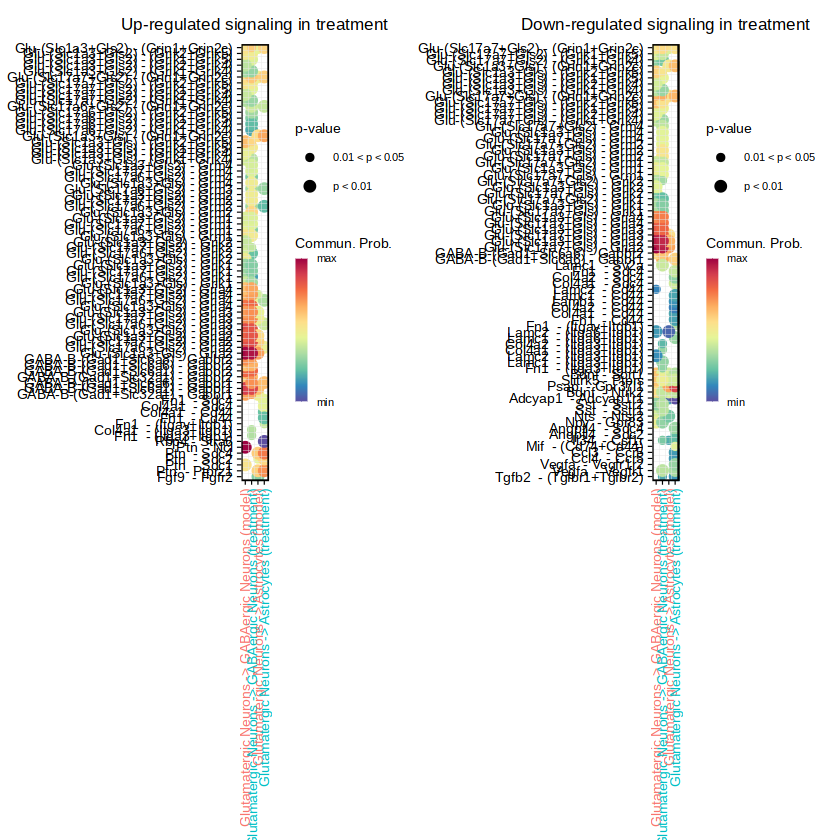

In [101]:
pairLR.use.up = net.up[, "interaction_name", drop = F]
gg1 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.up, sources.use = 4, targets.use = c(5:11), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
pairLR.use.down = net.down[, "interaction_name", drop = F]
gg2 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.down, sources.use = 4, targets.use = c(5:11), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))
gg1 + gg2

In [100]:
pdf("/home/zhangyinan/TXL_new/13_cell_chat/integrate/comparison/comparison/test.pdf", width =9, height = 20)
gg2
dev.off()

png 
  2

In [43]:
library(circlize)

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘circlize’


The following object is masked from ‘package:igraph’:

    degree




In [44]:
circlize::circos.clear()

In [45]:
# Chord diagram
par(mfrow = c(1,2), xpd=TRUE)
netVisual_chord_gene(object.list[[2]], sources.use = 1, targets.use = c(5:6), slot.name = 'net', net = net.up, lab.cex = 0.5, small.gap = 1, title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
netVisual_chord_gene(object.list[[1]], sources.use = 1, targets.use = c(5:6), slot.name = 'net', net = net.down, lab.cex = 0.5, small.gap = 1, title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))

ERROR: Error in netVisual_chord_gene(object.list[[2]], sources.use = 1, targets.use = c(5:6), : No signaling links are inferred! 


## 使用层次图、圆图或弦图直观地比较细胞间通讯

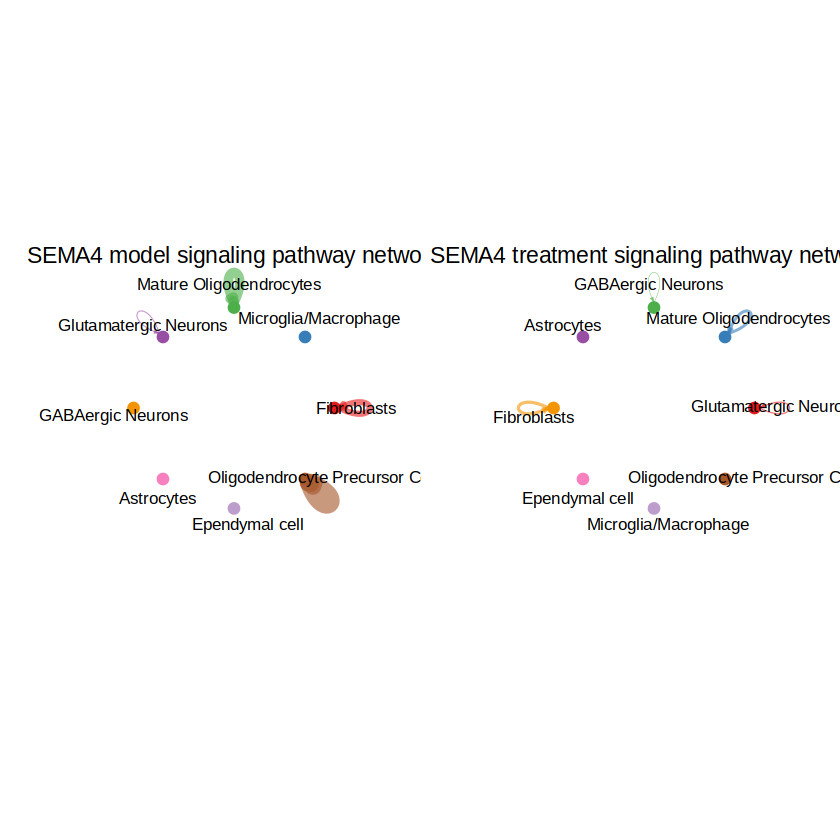

In [57]:
pathways.show <- c("SEMA4") 
weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) # control the edge weights across different datasets
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", edge.weight.max = weight.max[1], edge.width.max = 10, signaling.name = paste(pathways.show, names(object.list)[i]))
}

In [58]:
pathways.show <- c("SEMA4") 
par(mfrow = c(1,2), xpd=TRUE)
ht <- list()
for (i in 1:length(object.list)) {
  ht[[i]] <- netVisual_heatmap(object.list[[i]], signaling = pathways.show, color.heatmap = "Reds",title.name = paste(pathways.show, "signaling ",names(object.list)[i]))
}

Do heatmap based on a single object 




Do heatmap based on a single object 




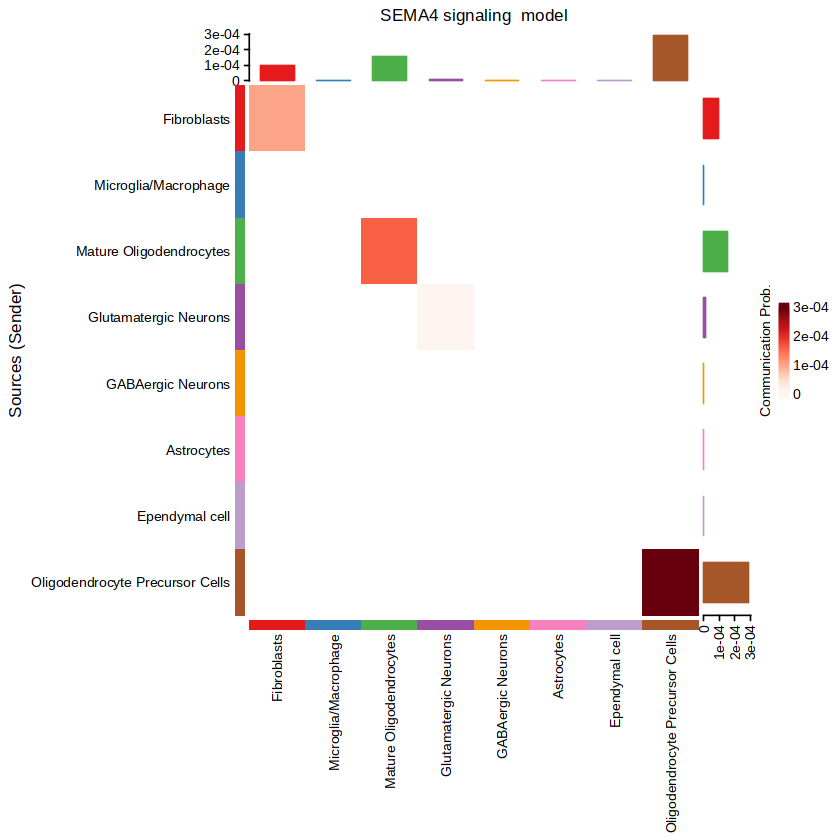

In [59]:
ht[[1]]

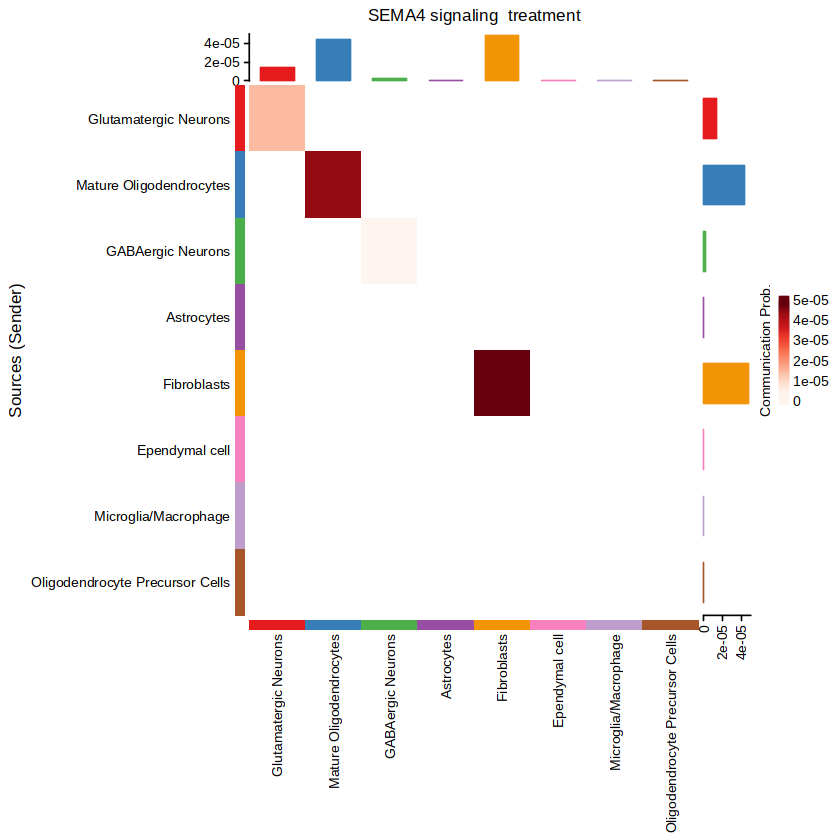

In [60]:
ht[[2]]

ERROR: Error: not enough space for cells at track index '1'.


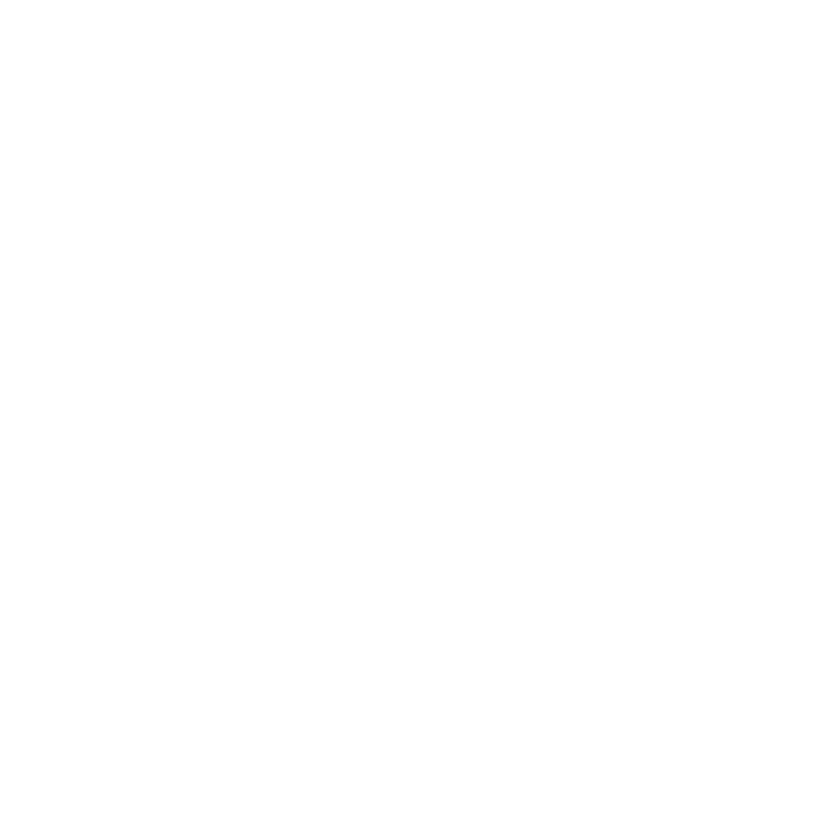

In [61]:
# Chord diagram
pathways.show <- c("SEMA4") 
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "chord", signaling.name = paste(pathways.show, names(object.list)[i]))
}

Plot the aggregated cell-cell communication network at the signaling pathway level



ERROR: Error: not enough space for cells at track index '1'.


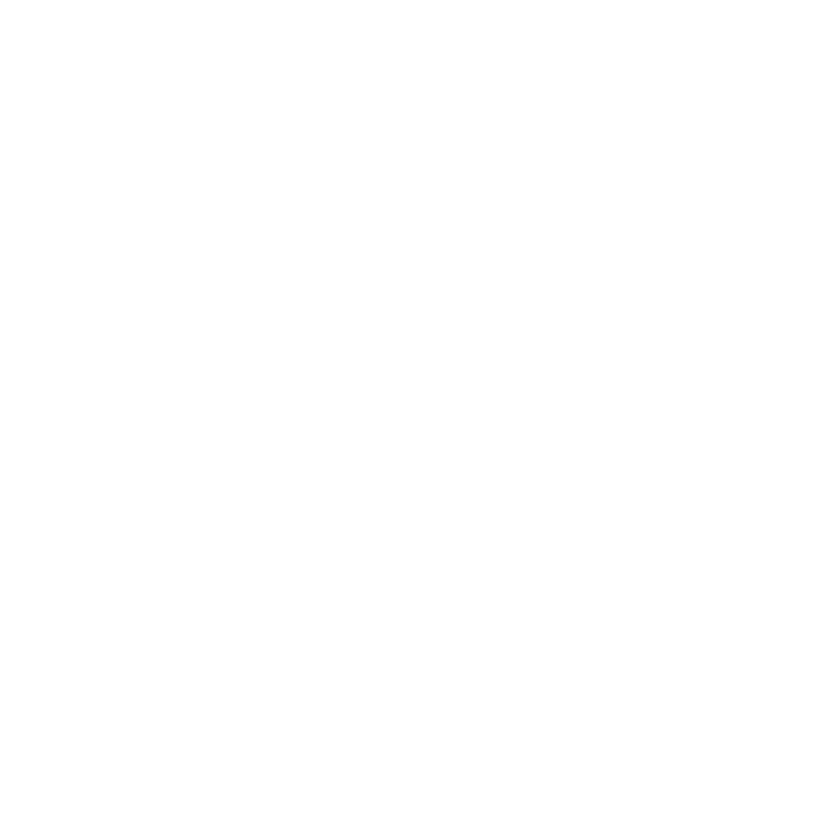

In [ ]:
# Chord diagram
group.cellType <- c(rep("FIB", 4), rep("DC", 4), rep("TC", 4)) # grouping cell clusters into fibroblast, DC and TC cells
names(group.cellType) <- levels(object.list[[1]]@idents)
pathways.show <- c("CXCL") 
par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_chord_cell(object.list[[i]], signaling = pathways.show, group = group.cellType, title.name = paste0(pathways.show, " signaling network - ", names(object.list)[i]))
}